In [1]:
import sys

sys.path.append("../../")

In [2]:
from src.eval import Study

In [3]:
DATA_DIR = "../../data/bo_vs_rl"

In [4]:
rl_v1_sim = Study.load(f"{DATA_DIR}/simulation/rl", name="RL (Sim)", runs="*problem_*")
rl_real = Study.load(
    f"{DATA_DIR}/real/rl_firstsub",
    runs="*problem_*",
    name="RL (real world)",
    drop_screen_images=False,
)
rl_sim_finite_screen = Study.load(
    f"{DATA_DIR}/simulation/rl_sim_finite_screen/",
    name="RL Quad-misaligned (Sim, finite)",
)
rl_quad_aligned_finite = Study.load(
    f"{DATA_DIR}/simulation/rl_quad_aligned_finite/",
    name="RL Quad-aligned (Sim, finite)",
)

In [5]:
print(
    f"{rl_v1_sim.name} ->"
    f" {rl_v1_sim.proportion_converged(max_steps=151, threshold=4e-5, use_min_mae=True)}"
)
print(
    f"{rl_real.name} ->"
    f" {rl_real.proportion_converged(max_steps=50, threshold=4e-5, use_min_mae=True)}"
)
print(
    f"{rl_sim_finite_screen.name} ->"
    f" {rl_sim_finite_screen.proportion_converged(max_steps=151, threshold=4e-5,use_min_mae=True)}"
)
print(
    f"{rl_quad_aligned_finite.name} ->"
    f" {rl_quad_aligned_finite.proportion_converged(max_steps=151, threshold=4e-5,use_min_mae=True)}"
)

RL (Sim) -> 1.0
RL (real world) -> 1.0
RL Quad-misaligned (Sim, finite) -> 1.0
RL Quad-aligned (Sim, finite) -> 1.0


In [6]:
print(
    f"{rl_v1_sim.name} ->"
    f" {rl_v1_sim.proportion_converged(max_steps=151, threshold=4e-5, use_min_mae=False)}"
)
print(
    f"{rl_real.name} ->"
    f" {rl_real.proportion_converged(max_steps=50, threshold=4e-5, use_min_mae=False)}"
)
print(
    f"{rl_sim_finite_screen.name} ->"
    f" {rl_sim_finite_screen.proportion_converged(max_steps=151, threshold=4e-5,use_min_mae=False)}"
)
print(
    f"{rl_quad_aligned_finite.name} ->"
    f" {rl_quad_aligned_finite.proportion_converged(max_steps=151, threshold=4e-5,use_min_mae=False)}"
)

RL (Sim) -> 1.0
RL (real world) -> 0.9545454545454546
RL Quad-misaligned (Sim, finite) -> 1.0
RL Quad-aligned (Sim, finite) -> 1.0


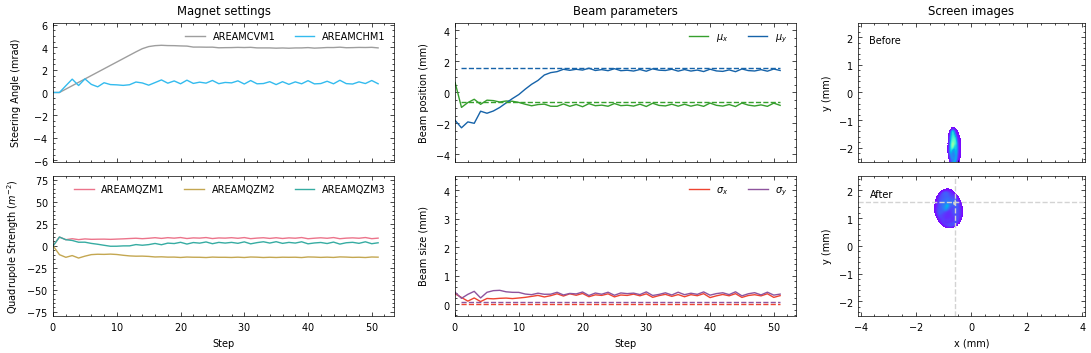

In [15]:
for episode in rl_real.episodes:
    if not episode.steps_to_convergence(threshold=4e-5, use_min_mae=False) < 50:
        episode.plot_summary()